#### About
ArUco markers generation and detection using OpenCV.
1. Similar to AprilTags, ArUco markers are distinct special markers placed in the view of the camera such that they are easily identifiable. 
2. They are square with binary values having background as black and foreground as white. The black border surrounding the pattern makes it easier to detect them.
3. They are used for camera calibration, object size estimation, measuring the distance between camera and object, 3D position, object orientation, robotics and autonomus navigation etc.
4. There are 21 different ArUco dictionaries built into OpenCV.

In [13]:
# generating aruco markers
#importing modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	#"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	#"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	#"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	#"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [7]:
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT["DICT_5X5_250"])

In [8]:
tag = np.zeros((500,500,1),dtype='uint8')
id= 55
cv2.aruco.drawMarker(arucoDict,55,500,tag,1)

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

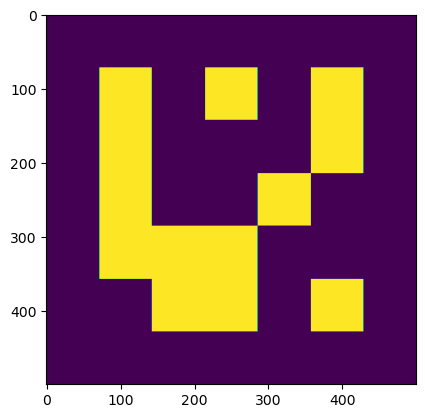

In [9]:
plt.imshow(tag)

In [25]:
#detecting aruco marker
image = cv2.imread('img.png')

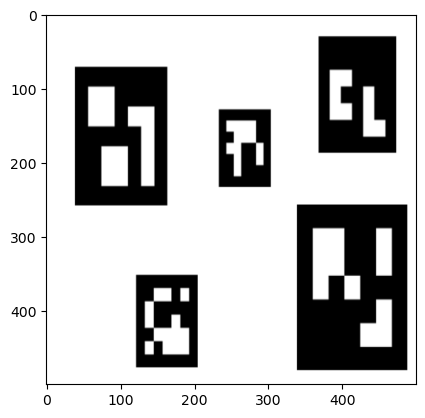

In [29]:
#resizing image
image = cv2.resize(image,(500,500))
plt.imshow(image)

In [36]:
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT["DICT_5X5_100"])
arucoParams = cv2.aruco.DetectorParameters_create()

corners,ids,rejected = cv2.aruco.detectMarkers(image,arucoDict,parameters=arucoParams)


In [37]:
print(corners)

[array([[[122., 351.],
        [205., 352.],
        [204., 478.],
        [121., 477.]]], dtype=float32), array([[[339., 256.],
        [488., 257.],
        [487., 481.],
        [338., 480.]]], dtype=float32), array([[[233., 128.],
        [304., 129.],
        [303., 234.],
        [232., 233.]]], dtype=float32), array([[[ 39.,  70.],
        [164.,  71.],
        [163., 259.],
        [ 38., 258.]]], dtype=float32), array([[[368.,  29.],
        [473.,  30.],
        [472., 188.],
        [367., 187.]]], dtype=float32)]


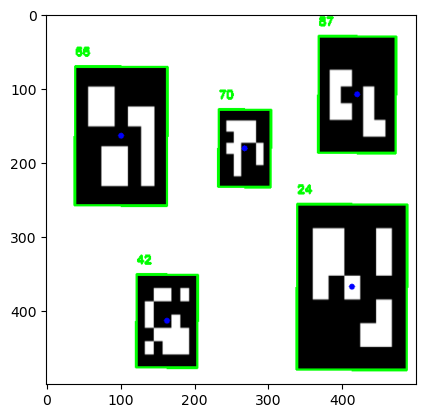

In [38]:
#if atleast one aruco corner is detected then draw
if len(corners) > 0:
	# flatten the ArUco IDs list
	ids = ids.flatten()

	# loop over the detected ArUCo corners
	for (markerCorner, markerID) in zip(corners, ids):
		# extract the marker corners (which are always returned in
		# top-left, top-right, bottom-right, and bottom-left order)
		corners = markerCorner.reshape((4, 2))
		(topLeft, topRight, bottomRight, bottomLeft) = corners

		# convert each of the (x, y)-coordinate pairs to integers
		topRight = (int(topRight[0]), int(topRight[1]))
		bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
		bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
		topLeft = (int(topLeft[0]), int(topLeft[1]))

		# draw the bounding box of the ArUCo detection
		cv2.line(image, topLeft, topRight, (0, 255, 0), 2)
		cv2.line(image, topRight, bottomRight, (0, 255, 0), 2)
		cv2.line(image, bottomRight, bottomLeft, (0, 255, 0), 2)
		cv2.line(image, bottomLeft, topLeft, (0, 255, 0), 2)

		# compute and draw the center (x, y)-coordinates of the ArUco
		# marker
		cX = int((topLeft[0] + bottomRight[0]) / 2.0)
		cY = int((topLeft[1] + bottomRight[1]) / 2.0)
		cv2.circle(image, (cX, cY), 4, (0, 0, 255), -1)

		# draw the ArUco marker ID on the image
		cv2.putText(image, str(markerID),
			(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 0), 2)

plt.imshow(image)